# __Lock in Amplifier Using EXPEYES__

### Importing the Libraries

In [204]:
import eyes17.eyes
import numpy as np
import math as m
import time
from scipy.fft import fft, ifft,fftfreq, fftshift

### Defining the Frequencies and Amplitude of the Input Signal

In [205]:
f=1000 #Hz
amp = 2 # 1=> 1V 2=> 3V
N_sample = 8192
N_div=64
t_gap = (1/(f*N_div))*10**6 #us

In [206]:
print(f"f = {f} Hz")
print(f"amp = {amp} V")
print(f"N_sample = {N_sample}")
print(f"N_div = {N_div}")
print(f"t_gap = {t_gap} us")

f = 1000 Hz
amp = 2 V
N_sample = 8192
N_div = 64
t_gap = 15.625 us


### Setting the Input Signal as a sine wave of frequency 1000Hz

In [207]:
p=eyes17.eyes.open()

p.set_sine_amp(amp)
p.set_sine(f)
# p.configure_trigger(0,'A1',-0.5)
t,v = p.capture1('A1',N_sample,t_gap) # Captured input signal

W###################-------------


### Generating the Reference Signals (Sine and Cosine)

In [208]:
V_sin_ref=[]
V_cos_ref=[]
t_ref = []
for i in range(N_sample):
    V_sin_ref.append(amp*m.sin(2*m.pi*f*i*t_gap*10**-6))
    V_cos_ref.append(amp*m.cos(2*m.pi*f*i*t_gap*10**-6))
    t_ref.append(i*t_gap)

print(len(V_sin_ref))    


8192


### Plotting the Reference and the input signals

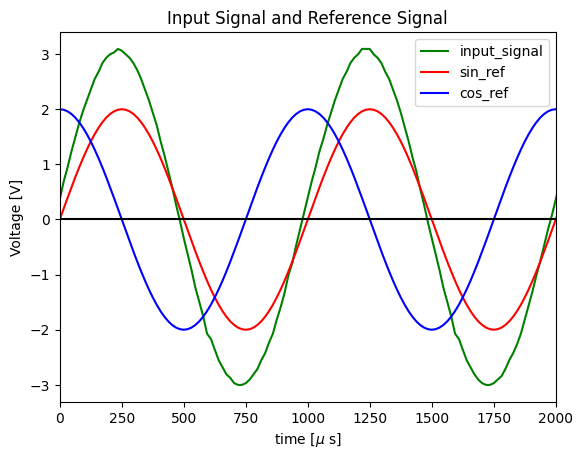

In [209]:
import matplotlib.pyplot as plt
plt.plot(t*1000,v,color='green',label='input_signal')
plt.plot(t_ref,V_sin_ref,color='red',label='sin_ref')
plt.plot(t_ref,V_cos_ref,color='blue',label='cos_ref')
plt.xlabel(r'time [$\mu $ s]')
plt.ylabel('Voltage [V]')
plt.xlim(0,2000)
plt.legend()
plt.title('Input Signal and Reference Signal')
plt.axhline(y=0, c="black")
plt.show()

### Phase matching (Multipling the input with sin)

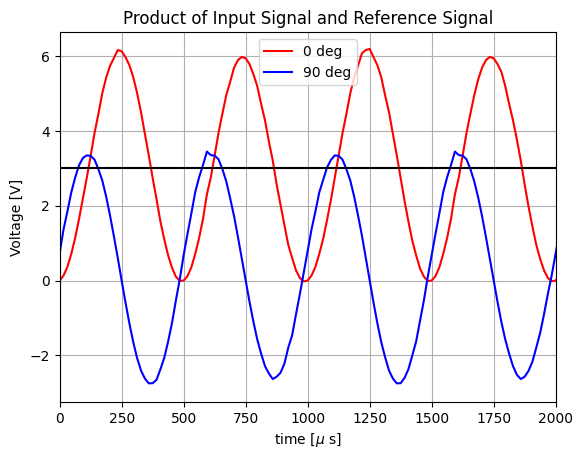

In [210]:
v_pm_sin = []
v_pm_cos = []
for i in range(N_sample):
    v_pm_sin.append(v[i]*V_sin_ref[i])
    v_pm_cos.append(v[i]*V_cos_ref[i])

import matplotlib.pyplot as plt_pm
plt_pm.plot(t_ref,v_pm_sin,color='red',label='0 deg')
plt_pm.plot(t_ref,v_pm_cos,color='blue',label='90 deg')
plt_pm.xlabel(r'time [$\mu $ s]')
plt_pm.title('Product of Input Signal and Reference Signal')
plt_pm.ylabel('Voltage [V]')
plt_pm.xlim(0,2000)
plt_pm.legend()
plt_pm.axhline(y=3, c="black")
plt.grid()
plt_pm.show()


### Taking FFT for Low Pass Filter

In [211]:
freq=fftfreq(N_sample,(t[1]-t[0])*0.001)
sine_fft=fft(v_pm_sin)
cos_fft=fft(v_pm_cos)

### Plotting the Sine wave in the frequency domain

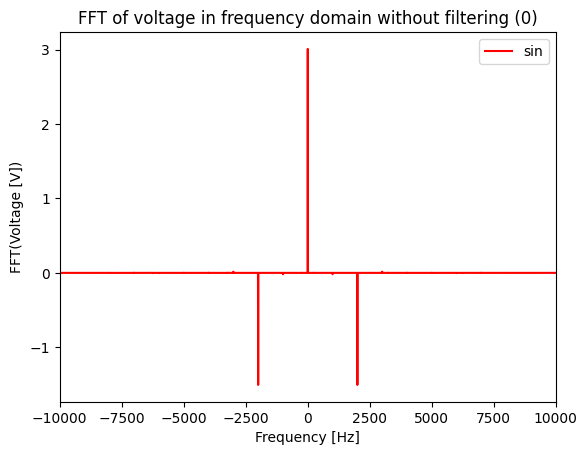

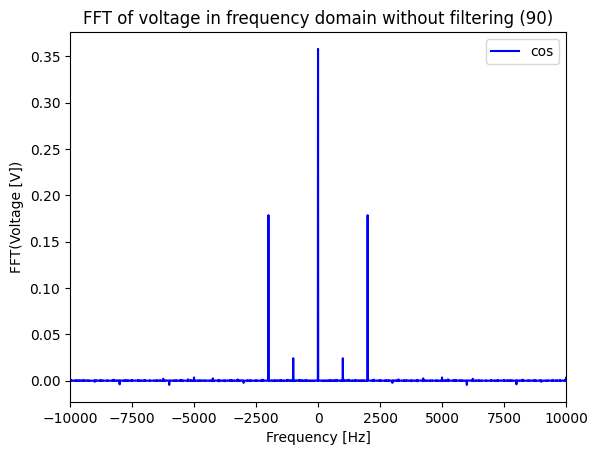

In [212]:
xf = fftshift(freq)
yplot = (1/N_sample) * fftshift(sine_fft)


import matplotlib.pyplot as plt_fft
plt_fft.plot(xf,(yplot),color='red',label='sin')
plt_fft.xlabel(r'Frequency [Hz]')
plt_fft.ylabel('FFT(Voltage [V])')
plt_fft.title('FFT of voltage in frequency domain without filtering (0)')
plt_fft.xlim(-10000,10000)
plt_fft.legend()
plt_fft.show()

yplot = (1/N_sample) * fftshift(cos_fft)

import matplotlib.pyplot as plt_fft
plt_fft.plot(xf,(yplot),color='blue',label='cos')
plt_fft.xlabel(r'Frequency [Hz]')
plt_fft.ylabel('FFT(Voltage [V])')
plt_fft.title('FFT of voltage in frequency domain without filtering (90)')
plt_fft.xlim(-10000,10000)
plt_fft.legend()
plt_fft.show()


### Calculating the Voltages

In [213]:
print("X component of the output Voltage",sine_fft[0].real/len(sine_fft))
print("Y component of the Output Voltage",cos_fft[0].real/len(cos_fft))
print("Voltage is",np.sqrt((sine_fft[0].real/len(sine_fft))**2+(cos_fft[0].real/len(cos_fft))**2),"V")

print("Phase of the output Voltage",m.atan((cos_fft[0].real/len(cos_fft))/(sine_fft[0].real/len(sine_fft)))*180/m.pi,"deg")

X component of the output Voltage 3.007768167779222
Y component of the Output Voltage 0.35813558012253477
Voltage is 3.029014764714045 V
Phase of the output Voltage 6.790250713329081 deg
